# Assignment 3
### Due 9/21. Do four of five.

In [69]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [70]:
os.chdir("/Users/josephhudson/Desktop/MSDS Fall 2025/DS_5030_HW_/data")
df=pd.read_csv("nhanes_data_17_18.csv")
df

/var/folders/_s/15_6ws_j3b7dnd8t_254kl5h0000gn/T/ipykernel_45507/2727840662.py:2: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("nhanes_data_17_18.csv")


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never
8362,102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never
8363,102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never
8364,102955.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I am going to analyze the "How Often Do You Feel Depressed" and "Take Medication For Depression" variables.

In [71]:
#checking the amount of missing values
df['HowOftenDoYouFeelDepressed'].isna().sum()

np.int64(2926)

There are 2926 missing values in the "HowOftenDoYouFeelDepressed" column.

In [72]:
df['HowOftenDoYouFeelDepressed'].unique()

array([nan,  1.,  0.,  4.,  2.,  3.])

In [73]:
#checking the amount of missing values
df['TakeMedicationForDepression'].isna().sum()

np.int64(2915)

There are 2915 missing values in the "TakeMedicationForDepression" column.

In [74]:
df['TakeMedicationForDepression'].unique()

array([nan,  0.,  1.])

In [75]:
pd.crosstab(df['TakeMedicationForDepression'], df['HowOftenDoYouFeelDepressed'])

HowOftenDoYouFeelDepressed,0.0,1.0,2.0,3.0,4.0
TakeMedicationForDepression,,,,,
0.0,2541,1575,355,259,150
1.0,33,151,90,129,154


In [76]:
pd.crosstab(df['TakeMedicationForDepression'], df['HowOftenDoYouFeelDepressed'],normalize='columns')

HowOftenDoYouFeelDepressed,0.0,1.0,2.0,3.0,4.0
TakeMedicationForDepression,,,,,
0.0,0.987179,0.912514,0.797753,0.667526,0.493421
1.0,0.012821,0.087486,0.202247,0.332474,0.506579


The "How Often Do You Feel Depressed" variable represents by its numbers if a person feels depressed daily, weekly, monthly, a few times a year, or never. I am going to assume that 0 means someone reported they were depressed daily and 4 is they are never depressed (not clear if that how it is based on meta file). If my assumption is correct, it appears generally that people who reported to be depressed more often were more likely to take medication for depression. This would be a plausible relationship between the variables.

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

The variables I am going to analyze are "OfMealsFromFastFoodOrPizzaPlace" and "HowHealthyIsTheDiet".

In [77]:
df['OfMealsFromFastFoodOrPizzaPlace'].isna().sum()

np.int64(1922)

In [78]:
df['HowHealthyIsTheDiet'].isna().sum()

np.int64(2540)

In [79]:
df.groupby('HowHealthyIsTheDiet')['OfMealsFromFastFoodOrPizzaPlace'].mean()

HowHealthyIsTheDiet
Excellent     1.270833
Fair         14.878240
Good          7.555617
Poor         20.289941
Very good     1.338028
Name: OfMealsFromFastFoodOrPizzaPlace, dtype: float64

It appears that people who reported eating more fast food meals, also reported having less healthy diets. 

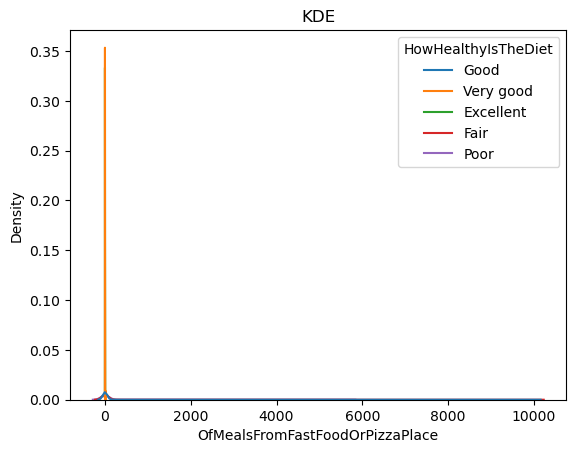

In [80]:
# Code from 02_using_information.ipynb
conditioner = 'HowHealthyIsTheDiet'
sns.kdeplot( data=df, x='OfMealsFromFastFoodOrPizzaPlace', hue=conditioner, common_norm=False ).set(title='KDE')

plt.show()

It appears the KDE Plot is messed up because the max Fast Food Meal value is very large

In [81]:
df['OfMealsFromFastFoodOrPizzaPlace'].max()

9999.0

In [82]:
top_scores_df = df.nlargest(n=10, columns='OfMealsFromFastFoodOrPizzaPlace')
top_scores_df["OfMealsFromFastFoodOrPizzaPlace"]

156     9999.0
5104    9999.0
6915    9999.0
2002    5555.0
6573    5555.0
1414      21.0
4293      21.0
4308      21.0
4760      21.0
4806      21.0
Name: OfMealsFromFastFoodOrPizzaPlace, dtype: float64

To make the KDE plot usable for my selected variables, I am going to drop the 5 rows in the data where the 'OfMealsFromFastFoodOrPizzaPlace' variable has an extremely high value

In [83]:
# idmax function shows the index value of the row where a specific column has its highest value
max_index= df['OfMealsFromFastFoodOrPizzaPlace'].idxmax()
df2=df.drop(max_index, inplace=False)
max_index= df2['OfMealsFromFastFoodOrPizzaPlace'].idxmax()
df2=df2.drop(max_index, inplace=False)
max_index= df2['OfMealsFromFastFoodOrPizzaPlace'].idxmax()
df2=df2.drop(max_index, inplace=False)
max_index= df2['OfMealsFromFastFoodOrPizzaPlace'].idxmax()
df2=df2.drop(max_index, inplace=False)
max_index= df2['OfMealsFromFastFoodOrPizzaPlace'].idxmax()
df2=df2.drop(max_index, inplace=False)


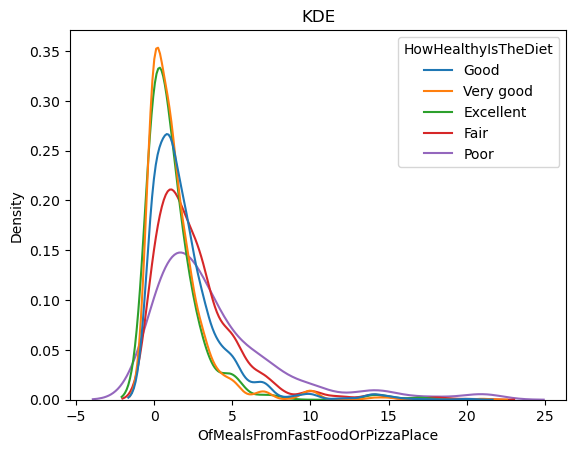

In [84]:

conditioner = 'HowHealthyIsTheDiet'
sns.kdeplot( data=df2, x='OfMealsFromFastFoodOrPizzaPlace', hue=conditioner, common_norm=False ).set(title='KDE')
plt.show()

We can see from the updated KDE plot that the people who had a diet of "Excellent" or "Very Good" tended to have a higher density of their meals from a fast food or pizza place be closer to 0 and a steeper drop in density as the amount of fast food meals increased. 

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

To minimize the squared error, we need to take its derivative and set that equal to 0. The derivative of the MSE equation with respect to  $$ \hat{y}(z) $$ and set to be equal to 0 is is

$$
d/d\hat{y}(z)MSE= \dfrac{1}{N} \sum_{i=1}^N 2\left\lbrace y_i - \hat{y}(z) \right\rbrace \frac{1}{h}k\left(\frac{z-x_i}{h}\right) = 0
$$

We can rearrange the equation to seperate the y_i and y_hat

$$
\dfrac{1}{N} \sum_{i=1}^N 2 (y_i) \frac{1}{h}k\left(\frac{z-x_i}{h}\right) = \dfrac{1}{N} \sum_{i=1}^N 2\left\lbrace \hat{y}(z) \right\rbrace \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$

We can get rid of the 2 on both sides

$$
\dfrac{1}{N} \sum_{i=1}^N  y_i \frac{1}{h}k\left(\frac{z-x_i}{h}\right) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace \hat{y}(z) \right\rbrace \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$

We can then isolated the y_hat of z on the left side

$$
\left\lbrace \hat{y}(z) \right\rbrace  = \dfrac{1}{N} \sum_{i=1}^N  y_i \frac{1}{h}k\left(\frac{z-x_i}{h}\right) /  \dfrac{1}{N}\sum_{i=1}^N \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$

The LCLS estimator can be seen below:

$$
\hat{y}_{N,h}(z) = \dfrac{\frac{1}{N} \sum_{i=1}^N y_i \times \frac{1}{h}k\left(\frac{z-x_i}{h}\right)}{\frac{1}{N} \sum_{i=1}^N \frac{1}{h}k\left(\frac{z-x_i}{h} \right)}
$$

So, we can see when solving for the minimum of the MSE, we end up with the LCLS estimator.

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

## I chose to skip this question and do the other 4.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

## Comparison of Overall Survival Months and Tumor Stage

In [90]:
df=  pd.read_csv("metabric.csv")

<Axes: xlabel='Tumor Stage', ylabel='Overall Survival (Months)'>

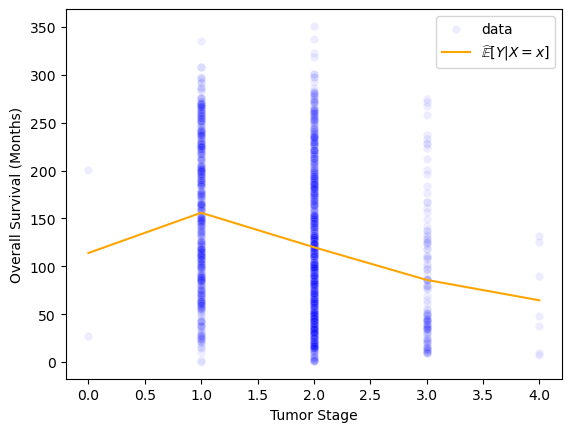

In [95]:
means = df.loc[:,['Overall Survival (Months)','Tumor Stage']].groupby("Tumor Stage").mean()
sns.scatterplot(data=df, y='Overall Survival (Months)', x='Tumor Stage',color='blue',alpha=.07, label='data')
sns.lineplot(data=means, x='Tumor Stage',y='Overall Survival (Months)',color='orange', label='$\\widehat{\\mathbb{E}}[Y|X=x]$')

The relationship between Tumor stage and Overall Survival in months seems plausiblly casual, because the later the stage of the tumor the less time a person probably has to live due to their cancer. Obviously, other factors like the quality of the healthcare and treatment a person receives can also affect how long they live after being diagnosed with cancer. 

The CEF is showing the relationship between tumour size and survival months, so it does not mean we know exactly the cause and effect relationship between the 2 variables. But this conditional expectation could still be as a model with some predictive power given their are trends that line up with surival months going down as tumor stage increases to the next stage. We can't identify the true nature of the relationship, but we can see that when Tumor Stage is equal to x, that Overall Survival months is around this mean. 

## Comparison of Tumor Mutational Burden and Tumor Size

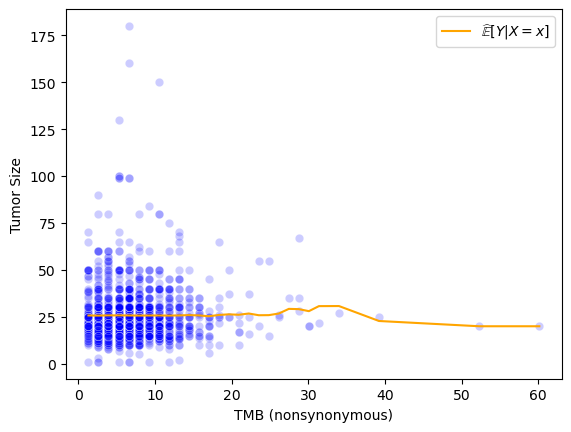

In [94]:


# Code from 02_using_information.ipynb
x = df['TMB (nonsynonymous)']
y = df['Tumor Size']

def nbhd_mean(x,y,h=5, plot=True):
    ''' Computes local constant least squares regression estimates with uniform kernel. '''
    n = len(x) # Number of observations
    grid = np.sort(x.unique()) # Extract and sort unique values for x
    I = np.abs( x.to_numpy().reshape(-1,1)-grid.reshape(1,-1) ) <= h # Compute the kernel
    numerator = y@I/(2*h) # Compute the numerator
    denominator = np.sum(I,axis=0)/(2*h) # Compute denominator
    y_hat = numerator/denominator # Compute estimator

    if plot:
        sns.scatterplot(data=df, y='Tumor Size', x='TMB (nonsynonymous)',color='blue',alpha=.2)
        sns.lineplot(x=grid,y=y_hat, color='orange',label='$\\widehat{\\mathbb{E}}[Y|X=x]$')

    return y_hat, grid
y_hat, grid = nbhd_mean(x,y,h=10)


The scatterplot above shows there is little pattern or clear relationship between Tumor Mutation Burden, TMB, and Tumour size. We can also see litle evidence of a relationsip based on the CEF, as the line displaying the CEF is almost completely horizontal.  The TMB variable is supposed to be measuring total number of non-synonymous, somatic mutations in a tumor's DNA (based on google searches). I thought that tumor with more mutations would end up being the tumors of the greater sizes.

Based on the plot above, it would not be advisable to use TMB to predict Tumor Size since there is little evidence of a relationship between the variables. But similar to my response for the last comparison, since we are not trying to understand the true nature of the relationship between the variables, we could use the conditional expectation as a predictive model. Since it is merely telling us what we expect our y to be given x, we are not saying their is an causal relationship but rather a trend. Unfortunately, between these variables there would be little to no predictive power based on the conditional expectation. 